In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
# Visualisation
import matplotlib.pyplot as plt
# Dataset exploring
import os
# Dataset generation
#from keras.preprocessing import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator
# Transfert learning
from keras.applications import VGG16
# Optimizer
from keras.optimizers import Adam
# Keras layers
from keras.layers import Input, Dense, Dropout, Flatten, AveragePooling2D
# Keras model
from keras.models import Model
import glob
import cv2

In [ ]:
classes = []
class_counter = 0

for dirname, _, filenames in os.walk('/content/drive/MyDrive/chestxraydataset/xray_dataset_covid19/test/'):
    if dirname.endswith('/'):
        continue
    else:
        classes.append({dirname.split('/')[-1]: 0})
    file_count = 0
    for filename in filenames:
        file_count += 1
    classes[class_counter][dirname.split('/')[-1]] = file_count
    class_counter += 1

print('{:<15} {:<15}'.format('Class', 'Number of instances'))
print()
for d in classes:
    [(k, v)] = d.items()
    print('{:<15} {:<15}'.format(k, v))

Class           Number of instances

PNEUMONIA       20             
NORMAL          20             


In [ ]:
#train and test directory path
train_dir= "/content/drive/MyDrive/chestxraydataset/xray_dataset_covid19/train/"
test_dir= "/content/drive/MyDrive/chestxraydataset/xray_dataset_covid19/test/"
im_size= 200
batch_size= 32

In [ ]:
def dir_img_lab(dir):
#fetch all the normal xray images and labels from given directory
  norm_img = glob.glob(dir+"NORMAL/*.jpeg")
  norm_labels = np.array(['normal']*len(norm_img))

  #fetch all the pneumonia xray images and labels from given directory
  pnm_img = glob.glob(dir+"PNEUMONIA/*.jpeg")
  pnm_labels = np.array(list(map(lambda x: x.split("_")[1],pnm_img)))

  return norm_img,norm_labels,pnm_img,pnm_labels

#get the normal and pneumonia images for training and testing
#and also get the labels
trn_norm_img,trn_norm_lab,trn_pnm_img,trn_pnm_lab= dir_img_lab(train_dir)
tst_norm_img,tst_norm_lab,tst_pnm_img,tst_pnm_lab= dir_img_lab(test_dir)

In [ ]:
def get_x(files):
#create a numpy array of the shape
#(number of images, image size , image size, 1 for grayscale channel ayer)
#this will be input for model
  train_x = np.zeros((len(files), im_size, im_size,1), dtype='float32')

  #iterate over img_file of given path
  for i, img_file in enumerate(files):
  #read the image file in a grayscale format and convert into numeric format
  #resize all images to one dimension i.e. 200x200
    img = cv2.resize(cv2.imread(img_file,cv2.IMREAD_GRAYSCALE),((im_size,im_size)))
    #reshape array to the train_x shape
    #1 for grayscale format
    img_array = np.expand_dims(np.array(img[...,::-1].astype(np.float32)).copy(), axis=0)
    train_x[i] = img_array.reshape(img_array.shape[1],img_array.shape[2],1)

  return train_x

#pass the normal and pneumonia images of training and testing sets
trn_norm_x= get_x(trn_norm_img)
trn_pnm_x= get_x(trn_pnm_img)
tst_norm_x= get_x(tst_norm_img)
tst_pnm_x= get_x(tst_pnm_img)

In [ ]:
print("train normal array shape :",trn_norm_x.shape)
print("train pneumonia array shape :",trn_pnm_x.shape)
print("\ntest normal array shape :",tst_norm_x.shape)
print("test pneumonia array shape :",tst_pnm_x.shape)

train normal array shape : (74, 200, 200, 1)
train pneumonia array shape : (41, 200, 200, 1)

test normal array shape : (20, 200, 200, 1)
test pneumonia array shape : (15, 200, 200, 1)


Training

In [ ]:
#epochs for model training and learning rate for optimizer
# epochs = 5
learning_rate = 1e-3

#using Adam optimizer to compile or build the model
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer,
      loss='categorical_crossentropy',
      metrics=["accuracy"])
#fit the training generator data and train the model
hist = model.fit(train_generator,steps_per_epoch= x_train.shape[0],epochs= 5,validation_data= test_generator,validation_steps= x_test.shape[0])
# hist = model.fit(train_datagen.flow(x_train,y_train,batch_size = 10),validation_data = (x_test,y_test) ,epochs  = 10)
#Accuracy Graph
plt.figure(figsize=(8,6))
plt.title('Accuracy scores')
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.show()

#Loss Graph
plt.figure(figsize=(8,6))
plt.title('Loss value')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

Simple CNN model

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import precision_recall_curve, roc_curve, accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import pickle
import os
import numpy as np
import cv2
%matplotlib inline

In [ ]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 200
def get_training_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
train = get_training_data('/content/drive/MyDrive/chestxraydataset/xray_dataset_covid19/train/')
test = get_training_data('/content/drive/MyDrive/chestxraydataset/xray_dataset_covid19/test/')
# val = get_training_data('../input/chest-xray-pneumonia/chest_xray/chest_xray/val')

<ipython-input-19-149d7cc0a3f4>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [ ]:
pnenumonia = 0
normal = 0

for i, j in train:
    if j == 0:
        pnenumonia+=1
    else:
        normal+=1

print('Pneumonia:', pnenumonia)
print('Normal:', normal)
# print('Pneumonia - Normal:', pnenumonia-normal)

Pneumonia: 74
Normal: 74


PNEUMONIA


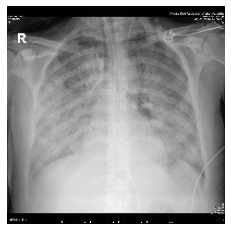

In [ ]:
plt.imshow(train[1][0], cmap='gray')
plt.axis('off')
print(labels[train[1][1]])

In [ ]:
X = []
y = []

for feature, label in train:
    X.append(feature)
    y.append(label)

for feature, label in test:
    X.append(feature)
    y.append(label)

# for feature, label in val:
#     X.append(feature)
#     y.append(label)


# resize data for deep learning
X = np.array(X).reshape(-1, img_size, img_size, 1)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=32)

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=90,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        vertical_flip=True)

datagen.fit(X_train)

In [ ]:
model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X_train.shape[1:], padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization(axis=1))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization(axis=1))

model.add(Conv2D(16, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization(axis=1))
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

early_stop = EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True)
adam = Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 256)     2560      
                                                                 
 activation (Activation)     (None, 200, 200, 256)     0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 256)    0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 100, 100, 256)    400       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      147520    
                                                                 
 activation_1 (Activation)   (None, 100, 100, 64)      0

In [ ]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=10), callbacks=[early_stop], validation_data=(X_test, y_test), epochs=15)

Epoch 1/15
12/12 [==============================] - 64s 5s/step - loss: 1.0668 - acc: 0.5333 - val_loss: 1.0077 - val_acc: 0.5526
Epoch 2/15
12/12 [==============================] - 61s 5s/step - loss: 0.7635 - acc: 0.5583 - val_loss: 0.5945 - val_acc: 0.7632
Epoch 3/15
12/12 [==============================] - 59s 5s/step - loss: 0.7055 - acc: 0.6333 - val_loss: 0.5935 - val_acc: 0.7368
Epoch 4/15
12/12 [==============================] - 59s 5s/step - loss: 0.6224 - acc: 0.6583 - val_loss: 0.6037 - val_acc: 0.7105
Epoch 5/15
12/12 [==============================] - 61s 5s/step - loss: 0.6095 - acc: 0.6917 - val_loss: 0.5640 - val_acc: 0.7895
Epoch 6/15
12/12 [==============================] - 58s 5s/step - loss: 0.5551 - acc: 0.7833 - val_loss: 0.4560 - val_acc: 0.8684
Epoch 7/15
12/12 [==============================] - 59s 5s/step - loss: 0.5268 - acc: 0.7250 - val_loss: 0.4674 - val_acc: 0.8158
Epoch 8/15
12/12 [==============================] - 60s 5s/step - loss: 0.4290 - acc: 0.80

In [ ]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 4s 698ms/step - loss: 0.4063 - acc: 0.8684


[0.4062996804714203, 0.8684210777282715]

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(history.epoch, history.history['acc'])
plt.title('Model Accuracy')
plt.legend(['train'], loc='upper left')
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(history.epoch, history.history['loss'])
plt.title('Model Loss')
plt.legend(['train'], loc='upper left')
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(history.epoch, history.history['val_acc'])
plt.title('Model Validation Accuracy')
plt.legend(['train'], loc='upper left')
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(history.epoch, history.history['val_loss'])
plt.title('Model Validation Loss')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
pred = model.predict(X_train)
precisions, recalls, thresholds = precision_recall_curve(y_train, pred)
fpr, tpr, thresholds2 = roc_curve(y_train, pred)

4/4 [==============================] - 17s 4s/step


In [ ]:
def plot_precision_recall(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--')
    plt.plot(thresholds, recalls[:-1], 'g-')
    plt.title('Precision vs. Recall')
    plt.xlabel('Thresholds')
    plt.legend(['Precision', 'Recall'], loc='best')
    plt.show()

def plot_roc(fpr, tpr):
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('FPR (False Positive rate) vs TPR (True Positive Rate)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.show()

plot_precision_recall(precisions, recalls, thresholds)
plot_roc(fpr, tpr)

In [ ]:
predictions = model.predict(X_test)

2/2 [==============================] - 7s 672ms/step


In [ ]:
binary_predictions = []
threshold = thresholds[np.argmax(precisions >= 0.80)]
for i in predictions:
    if i >= threshold:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0)

In [ ]:
print('Accuracy on testing set:', accuracy_score(binary_predictions, y_test))
print('Precision on testing set:', precision_score(binary_predictions, y_test))
print('Recall on testing set:', recall_score(binary_predictions, y_test))

Accuracy on testing set: 0.868421052631579
Precision on testing set: 0.8421052631578947
Recall on testing set: 0.8888888888888888


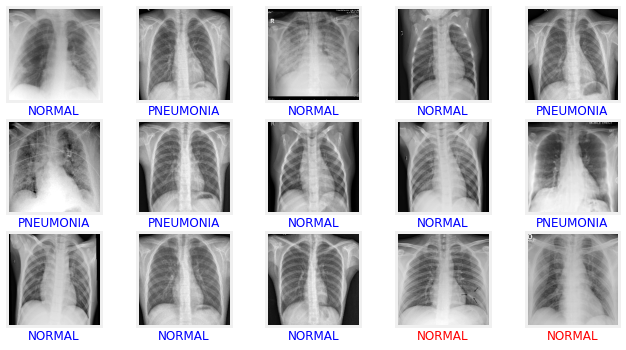

In [ ]:
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train.reshape(-1, img_size, img_size)[i], cmap='gray')
    if(binary_predictions[i]==y_test[i]):
        plt.xlabel(labels[binary_predictions[i]], color='blue')
    else:
        plt.xlabel(labels[binary_predictions[i]], color='red')
plt.show()